# Eyeglasses

In [2]:
from fermat_utils import *
from generate_data import *
import matplotlib.pyplot as plt

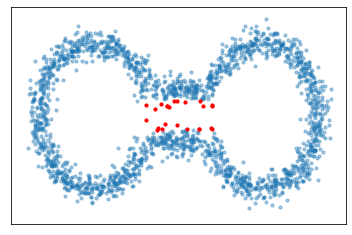

In [3]:
data = np.loadtxt('data/eyeglasses.txt')
#data generated with the function eyeglasses(2000, 0, 'normal', 0.1)
#you can also generate different samples of the eyeglasses dataset with the function eyeglasses(n_obs, n_out, type_noise, var)

mask1 = np.bitwise_and(data[:,1]<0.2 , data[:,1]>-0.2)
mask2 = np.bitwise_and(data[:,0]>-1, data[:,0]<1)
mask = np.bitwise_and(mask1, mask2)
noisy_points = data[mask]
fig = plt.figure()
plt.scatter(data[~mask][:,0], data[~mask][:,1], s=10, alpha=0.4)
plt.scatter(data[mask][:,0], data[mask][:,1], s=10, alpha=1, color='red')
plt.xticks([])
plt.yticks([])
plt.axis([-3,3, -1.5, 1.5])
plt.show()

## 1. Embeddings

### Isomap

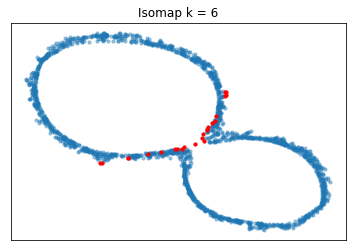

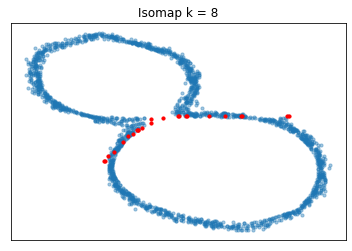

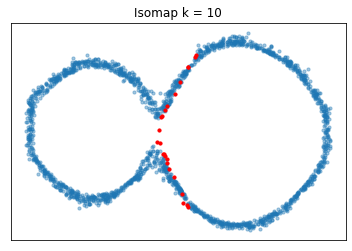

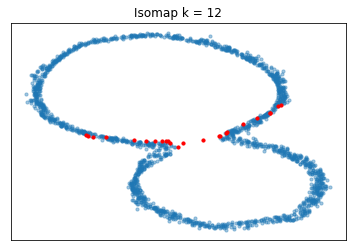

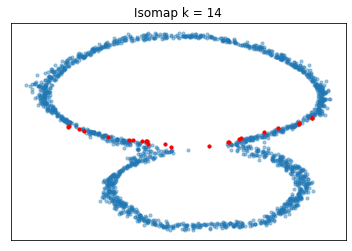

In [16]:
#from sklearn.manifold import Isomap
from sklearn.manifold import MDS

embedding = MDS(n_components=2, dissimilarity='precomputed')

for i,k in enumerate(range(6,15,2)):
    data_transformed = embedding.fit_transform(compute_ISOMAP_distance(data, k))
    fig = plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.scatter(data_transformed[~mask][:,0], data_transformed[~mask][:,1], s=10, alpha = 0.4)
    plt.scatter(data_transformed[mask][:,0], data_transformed[mask][:,1], s=10, alpha = 1, color = 'red')
    plt.title('Isomap k = %s'%(k))

### Multidimensional Scaling with Fermat distance

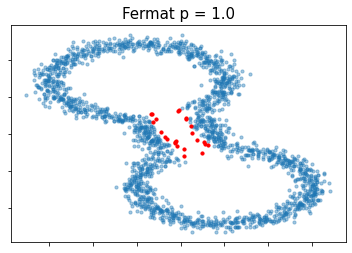

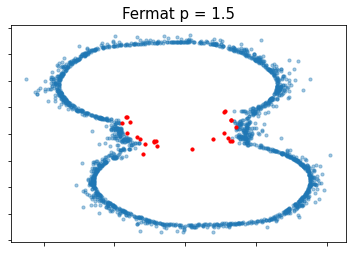

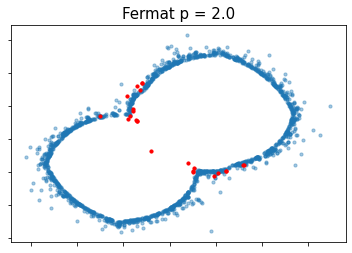

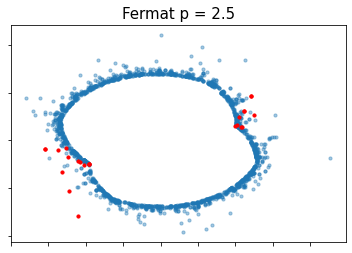

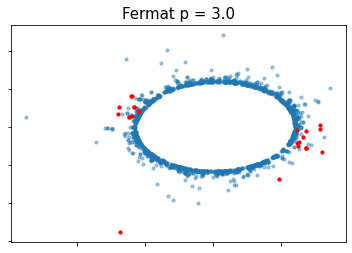

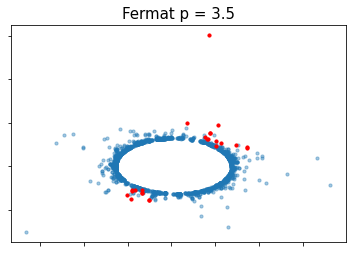

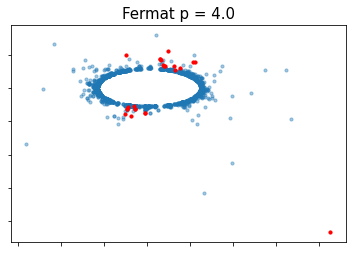

In [5]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2, dissimilarity='precomputed')

for p in np.linspace(1,4,7):
    data_transformed = embedding.fit_transform(compute_fermat_distance(data, p))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data_transformed[~mask][:,0], data_transformed[~mask][:,1], alpha=0.4, s=10)
    ax.scatter(data_transformed[mask][:,0], data_transformed[mask][:,1], alpha=1, s=10, color='red')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Fermat p = %s'%(p), fontsize=15)


## 2. Persistent Homology

In [6]:
from ripser import Rips

### Euclidean Distance

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'Euclidean distance')

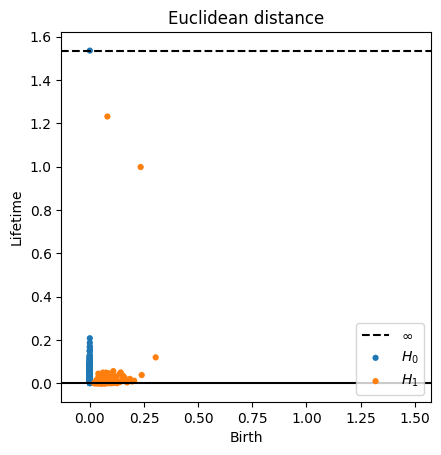

In [10]:
rips = Rips()
dgms = rips.fit_transform(data)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean distance')
plt.show()

### Isomap distance

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


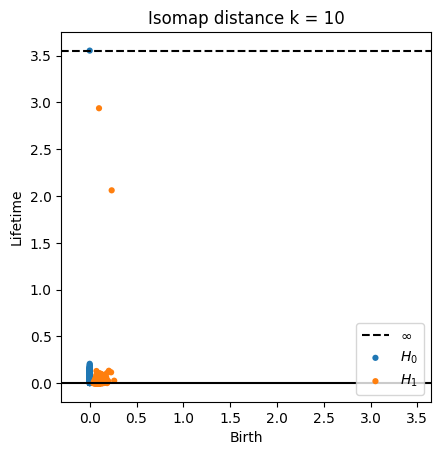

In [8]:
k=10
distance_matrix = compute_ISOMAP_distance(data, k)
rips = Rips()
dgms = rips.fit_transform(distance_matrix, distance_matrix=True)
rips.plot(dgms, lifetime=True)
plt.title('Isomap distance k = %s'%(k))
plt.show()

### Fermat Distance

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


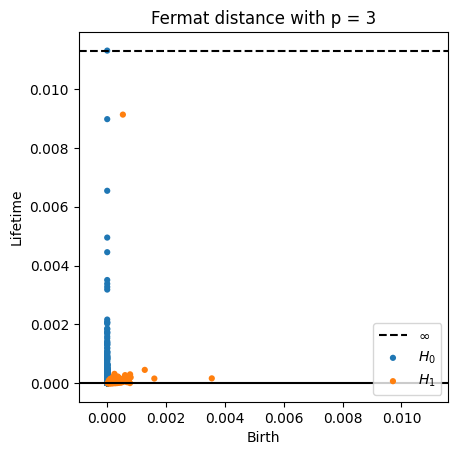

In [4]:
dgms3 = Fermat_dgm(data, p=3)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


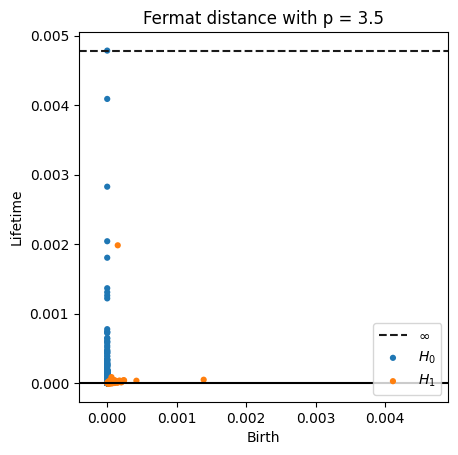

In [17]:
dgms35 = Fermat_dgm(data, p=3.5)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


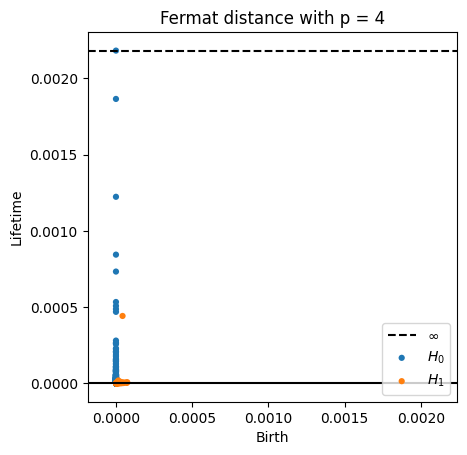

In [5]:
dgms4 = Fermat_dgm(data, p=4)

## 3. Reach vs Convexity radius

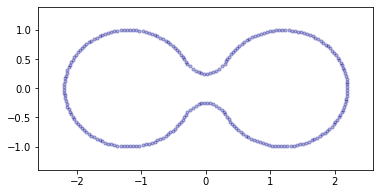

In [9]:
eyeglasses_1 = np.loadtxt('eyeglasses_tight.txt')
figure, ax = plt.subplots(figsize=(6,3))
plt.scatter(eyeglasses_1[:,0],eyeglasses_1[:,1], s=10, alpha=0.3, color='darkblue')
ax.set_xlim(-2.6,2.6)
ax.set_ylim(-1.4,1.4)
plt.show()

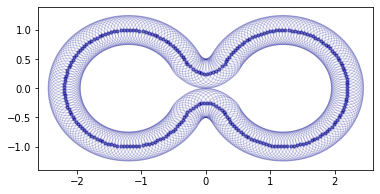

In [63]:
figure, ax = plt.subplots(figsize=(6,3))
for j in range(np.shape(eyeglasses_1)[0]):
    circle = plt.Circle((eyeglasses_1[j,0], eyeglasses_1[j,1]), 0.25, facecolor='white', fill=False, edgecolor='darkblue', alpha=.2)
    ax.add_artist(circle)
plt.scatter(eyeglasses_1[:,0],eyeglasses_1[:,1], s=10, alpha=0.5, color='darkblue')
ax.set_xlim(-2.6,2.6)
ax.set_ylim(-1.4,1.4)

#### Euclidean Distance

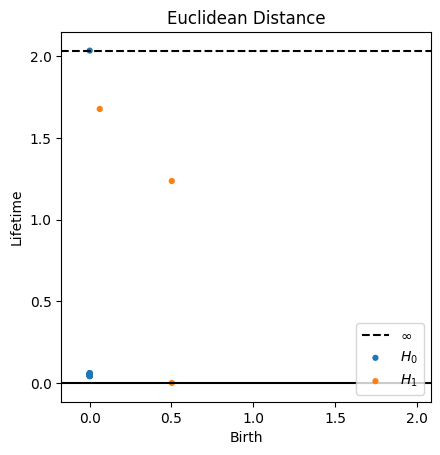

In [22]:
dgms = rips.fit_transform(eyeglasses_1)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean Distance')
plt.show()

In [ ]:
# numerical estimation of mu(p=2, d=1)
mu=1.9265140602860802

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


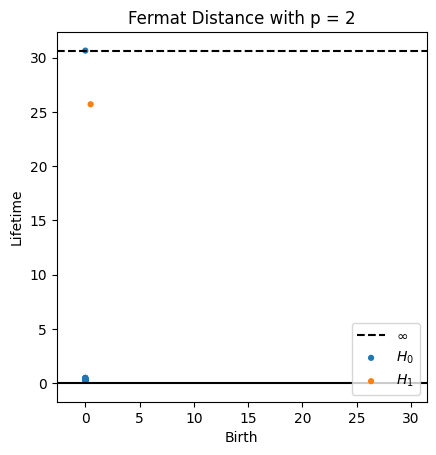

In [145]:
dgm_1 = Fermat_dgm(eyeglasses_1, p=2, rescaled=True, d=1, mu=mu)

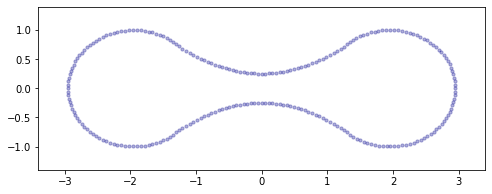

In [13]:
eyeglasses_2 = np.loadtxt('eyeglasses_long.txt')
figure, ax = plt.subplots(figsize=(8,3))
plt.scatter(eyeglasses_1[:,0],eyeglasses_1[:,1], s=10, alpha=0.3, color='darkblue')
ax.set_xlim(-3.4,3.4)
ax.set_ylim(-1.4,1.4)
plt.show()

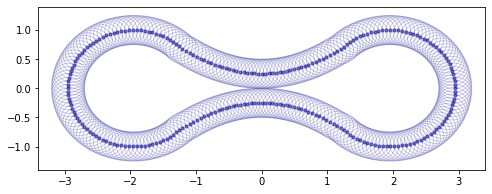

In [14]:
figure, ax = plt.subplots(figsize=(8,3))
for j in range(np.shape(eyeglasses_2)[0]):
    circle = plt.Circle((eyeglasses_2[j,0], eyeglasses_2[j,1]), 0.25, facecolor='white', fill=False, edgecolor='darkblue', alpha=.2)
    ax.add_artist(circle)
plt.scatter(eyeglasses_2[:,0],eyeglasses_2[:,1], s=10, alpha=0.5, color = 'darkblue')
ax.set_xlim(-3.4,3.4)
ax.set_ylim(-1.4,1.4)
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 895 ms, sys: 98.9 ms, total: 994 ms
Wall time: 911 ms


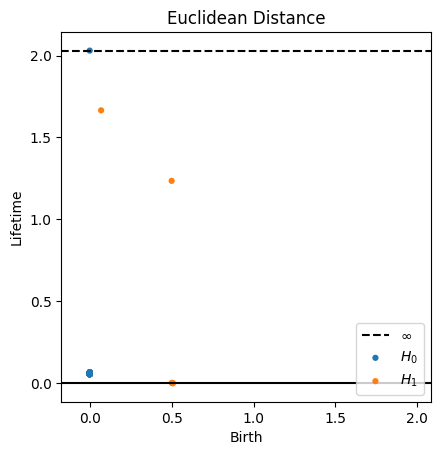

In [195]:
rips = Rips()
dgms = rips.fit_transform(eyeglasses_2)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean Distance')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


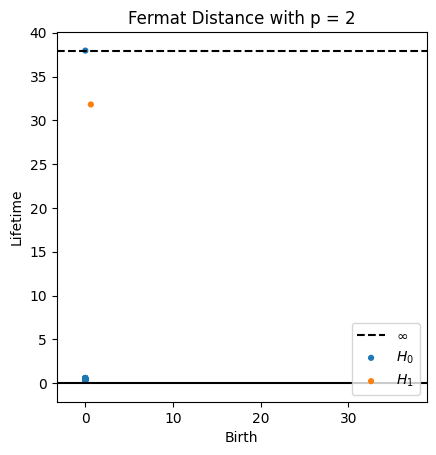

In [197]:
dgm_2 = Fermat_dgm(eyeglasses_2, p=2, rescaled = True, d=1, mu=mu)